In [54]:
import data_clean
from keras.applications import xception
from keras.applications.xception import *
from keras.applications import inception_v3
from keras.applications import resnet50
import numpy as np
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import generator

In [2]:
model = Xception(weights='imagenet')
top = [5,10,30,50]
indexs = data_clean.get_dirty_img(model, 299, 299, top, xception.preprocess_input, xception.decode_predictions)

In [3]:
import pickle as pkl

In [4]:
with open('dirty_indexs_Xception.pkl','wb') as file:
    pkl.dump(indexs, file)

In [6]:
with open('dirty_indexs_Xception.pkl','rb') as file:
    indexs = pkl.load(file)

In [9]:
print(len(indexs))

index_5 = [indexs[0] , indexs[4]]
index_10 = [indexs[1] , indexs[5]]
index_30 = [indexs[2] , indexs[6]]
index_50 = [indexs[3] , indexs[7]]

8


In [10]:
from random import randint

In [28]:
def get_example(index, top, pic_num = 5):
    for i in range(pic_num):
        cnt = randint(1,len(index[0]))
        plt.subplot(2,5,i+1)
        img = plt.imread('./train/'+index[0][cnt-1])
        plt.imshow(img)
        plt.axis('off')

        cnt = randint(1, len(index[1]))
        plt.subplot(2,5,5+i+1)
        img = plt.imread('./train/'+index[1][cnt-1])
        plt.imshow(img)
        plt.axis('off')

    plt.suptitle('top-%d get %d dirty img'%(top,len(index[0])+len(index[1])))
    plt.show()

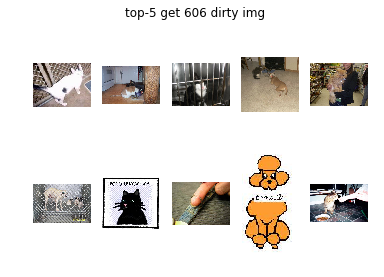

In [29]:
get_example(index_5, 5)

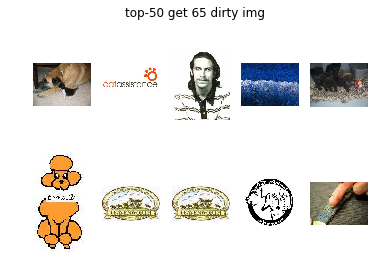

In [30]:
get_example(index_50, 50)

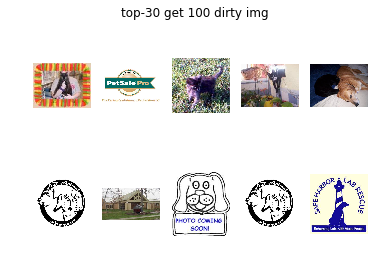

In [31]:
get_example(index_30, 30)

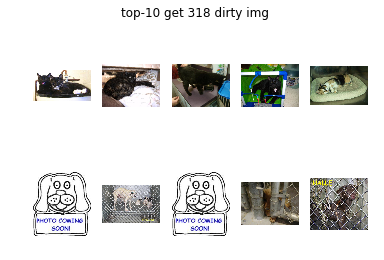

In [32]:
get_example(index_10, 10)

In [36]:
model_inception = inception_v3.InceptionV3(weights='imagenet')

In [37]:
top = [5,10,30,50]
inceptionV3_indexs = data_clean.get_dirty_img(model_inception, 299, 299, top, inception_v3.preprocess_input, inception_v3.decode_predictions)

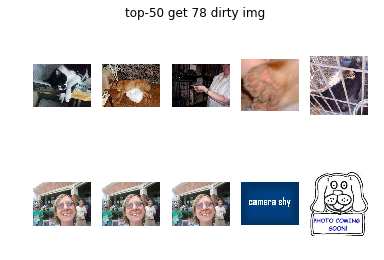

In [38]:
inceptionV3_index_50 = [inceptionV3_indexs[3],inceptionV3_indexs[7]]
get_example(inceptionV3_index_50, 50)

In [42]:
for item in inceptionV3_index_50[1]:
    if item not in index_50[1]:
        print(item)

dog.1194.jpg
dog.1773.jpg
dog.2422.jpg
dog.4507.jpg


In [48]:
def showimg(name):
    img_1 = image.load_img('./train/%s'%name, target_size=(299,299))
    img_1 = image.img_to_array(img_1)
    plt.axis('off')
    plt.imshow(img_1.astype(np.uint8))

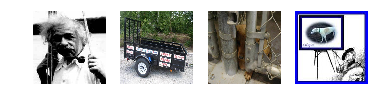

In [53]:
plt.subplot(1,4,1)
showimg('dog.1773.jpg')
plt.subplot(1,4,2)
showimg('dog.1194.jpg')
plt.subplot(1,4,3)
showimg('dog.2422.jpg')
plt.subplot(1,4,4)
showimg('dog.4507.jpg')
#plt.suptitle('InceptionV3 diff from Xception')

In [56]:
model_resnet = resnet50.ResNet50(weights='imagenet')

In [57]:
top = [5,10,30,50]
resnet_indexs = data_clean.get_dirty_img(model_resnet, 224, 224, top, resnet50.preprocess_input, resnet50.decode_predictions)

In [58]:
index_resnet_50 = [resnet_indexs[3],resnet_indexs[7]]

In [59]:
print(len(index_resnet_50[0])+len(index_resnet_50[1]))

160


In [63]:
final_dirty_cat = list(set(index_50[0]+index_resnet_50[0]+inceptionV3_index_50[0]))
final_dirty_dog = list(set(index_50[1]+index_resnet_50[1]+inceptionV3_index_50[1]))

In [64]:
print(len(final_dirty_cat))
print(len(final_dirty_dog))

168
27


In [66]:
with open('dirty_indexs_final.pkl','wb') as file:
    pkl.dump([final_dirty_cat,final_dirty_dog] , file)

In [ ]:
generator.create_dir_for_keras_img_generator(index[0]+index[1])